Initialization

In [10]:
from PIL import Image
import numpy as np
import os
import pickle
import cv2
from IPython.display import display

from filters import lowpass, highpass

data_dir = './data/'
C = 2048
R = 2048

data_names = []
images = []

if os.path.exists('images.pkl'):
    with open('images.pkl', 'rb') as f:
        images = pickle.load(f)
else:
    for dirname in os.listdir(data_dir):
        if dirname.startswith('LuoJia1'):
            im = Image.open('{}{}/{}_gec.tif'.format(data_dir, dirname, dirname))
            np_img = np.asarray(im.getdata())
            # restore normal FP representation, but magnified 1e5 times or it's too dark
            np_img = np_img ** (3 / 2) * 1e-5
            w, h = im.size
            np_img.shape = (h, w)
            images.append(cv2.resize(np_img, (R, C)))
    with open('images.pkl', 'wb') as f:
        pickle.dump(images, f)


def show_img(out_img):
    display(Image.fromarray(out_img).convert('RGB'))

Load an image

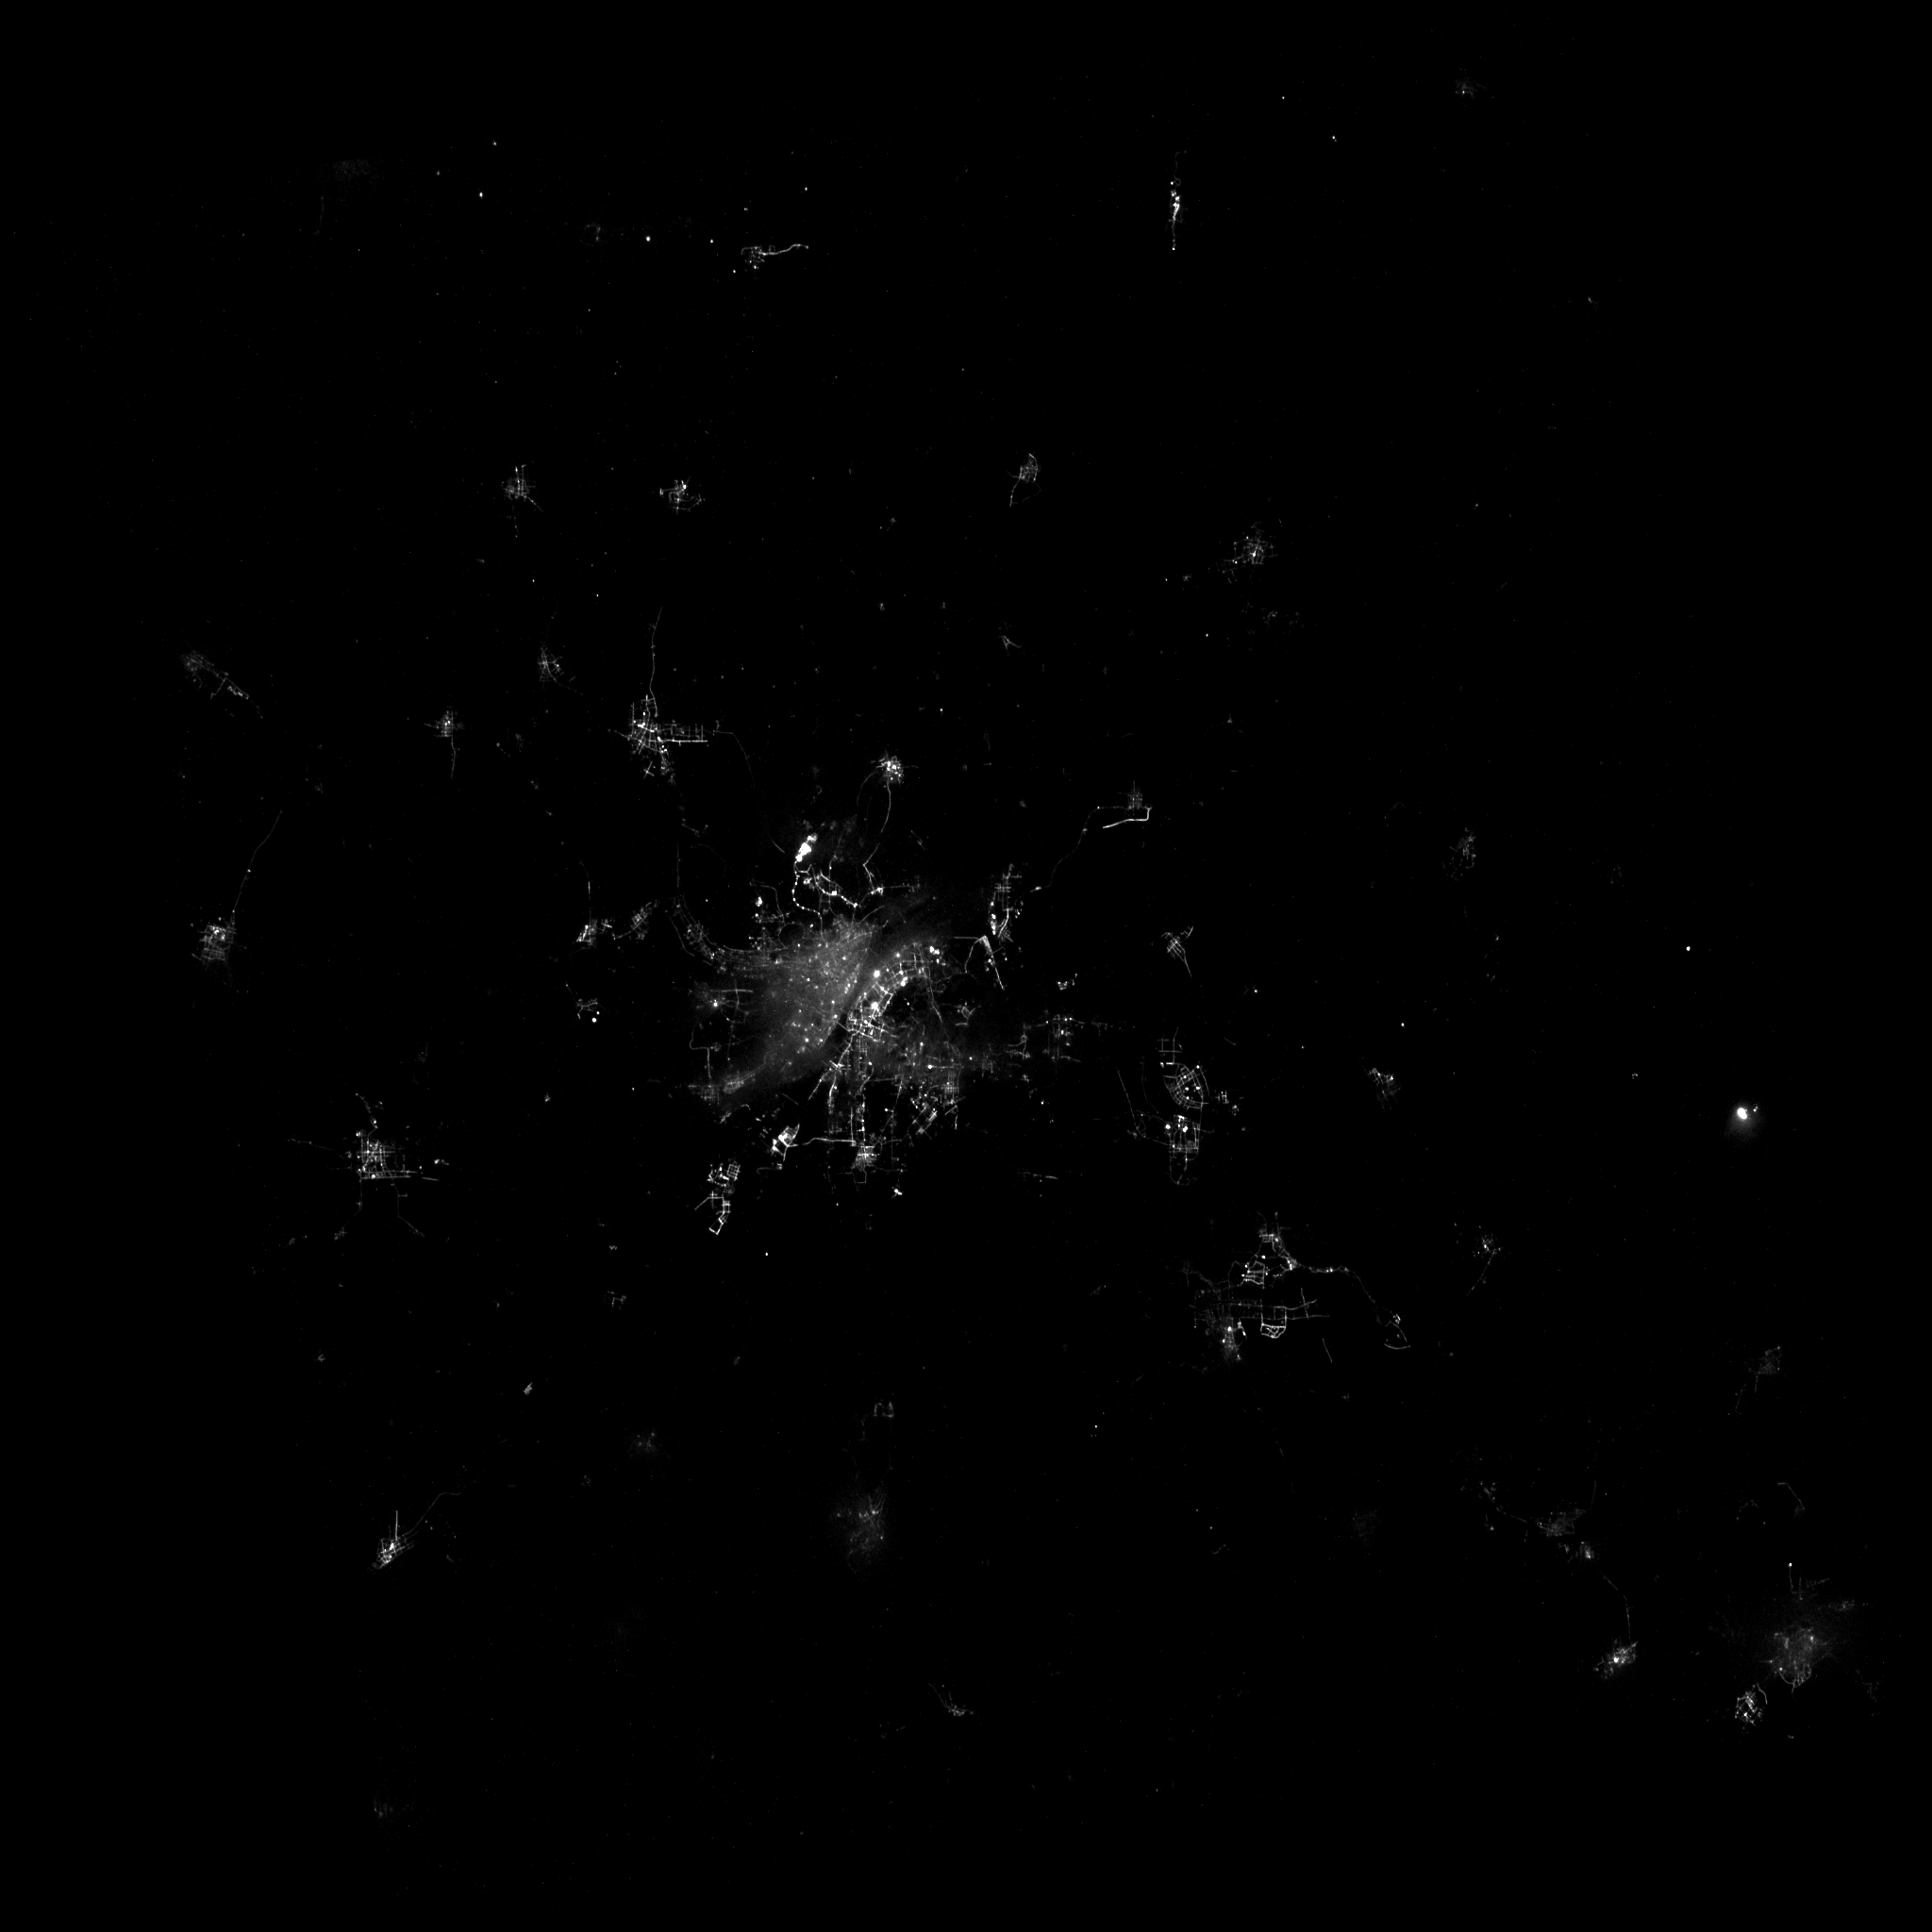

In [11]:
img = images[1]
show_img(img)

Apply unsharp mask, streetlights are sharpened and cloud remains

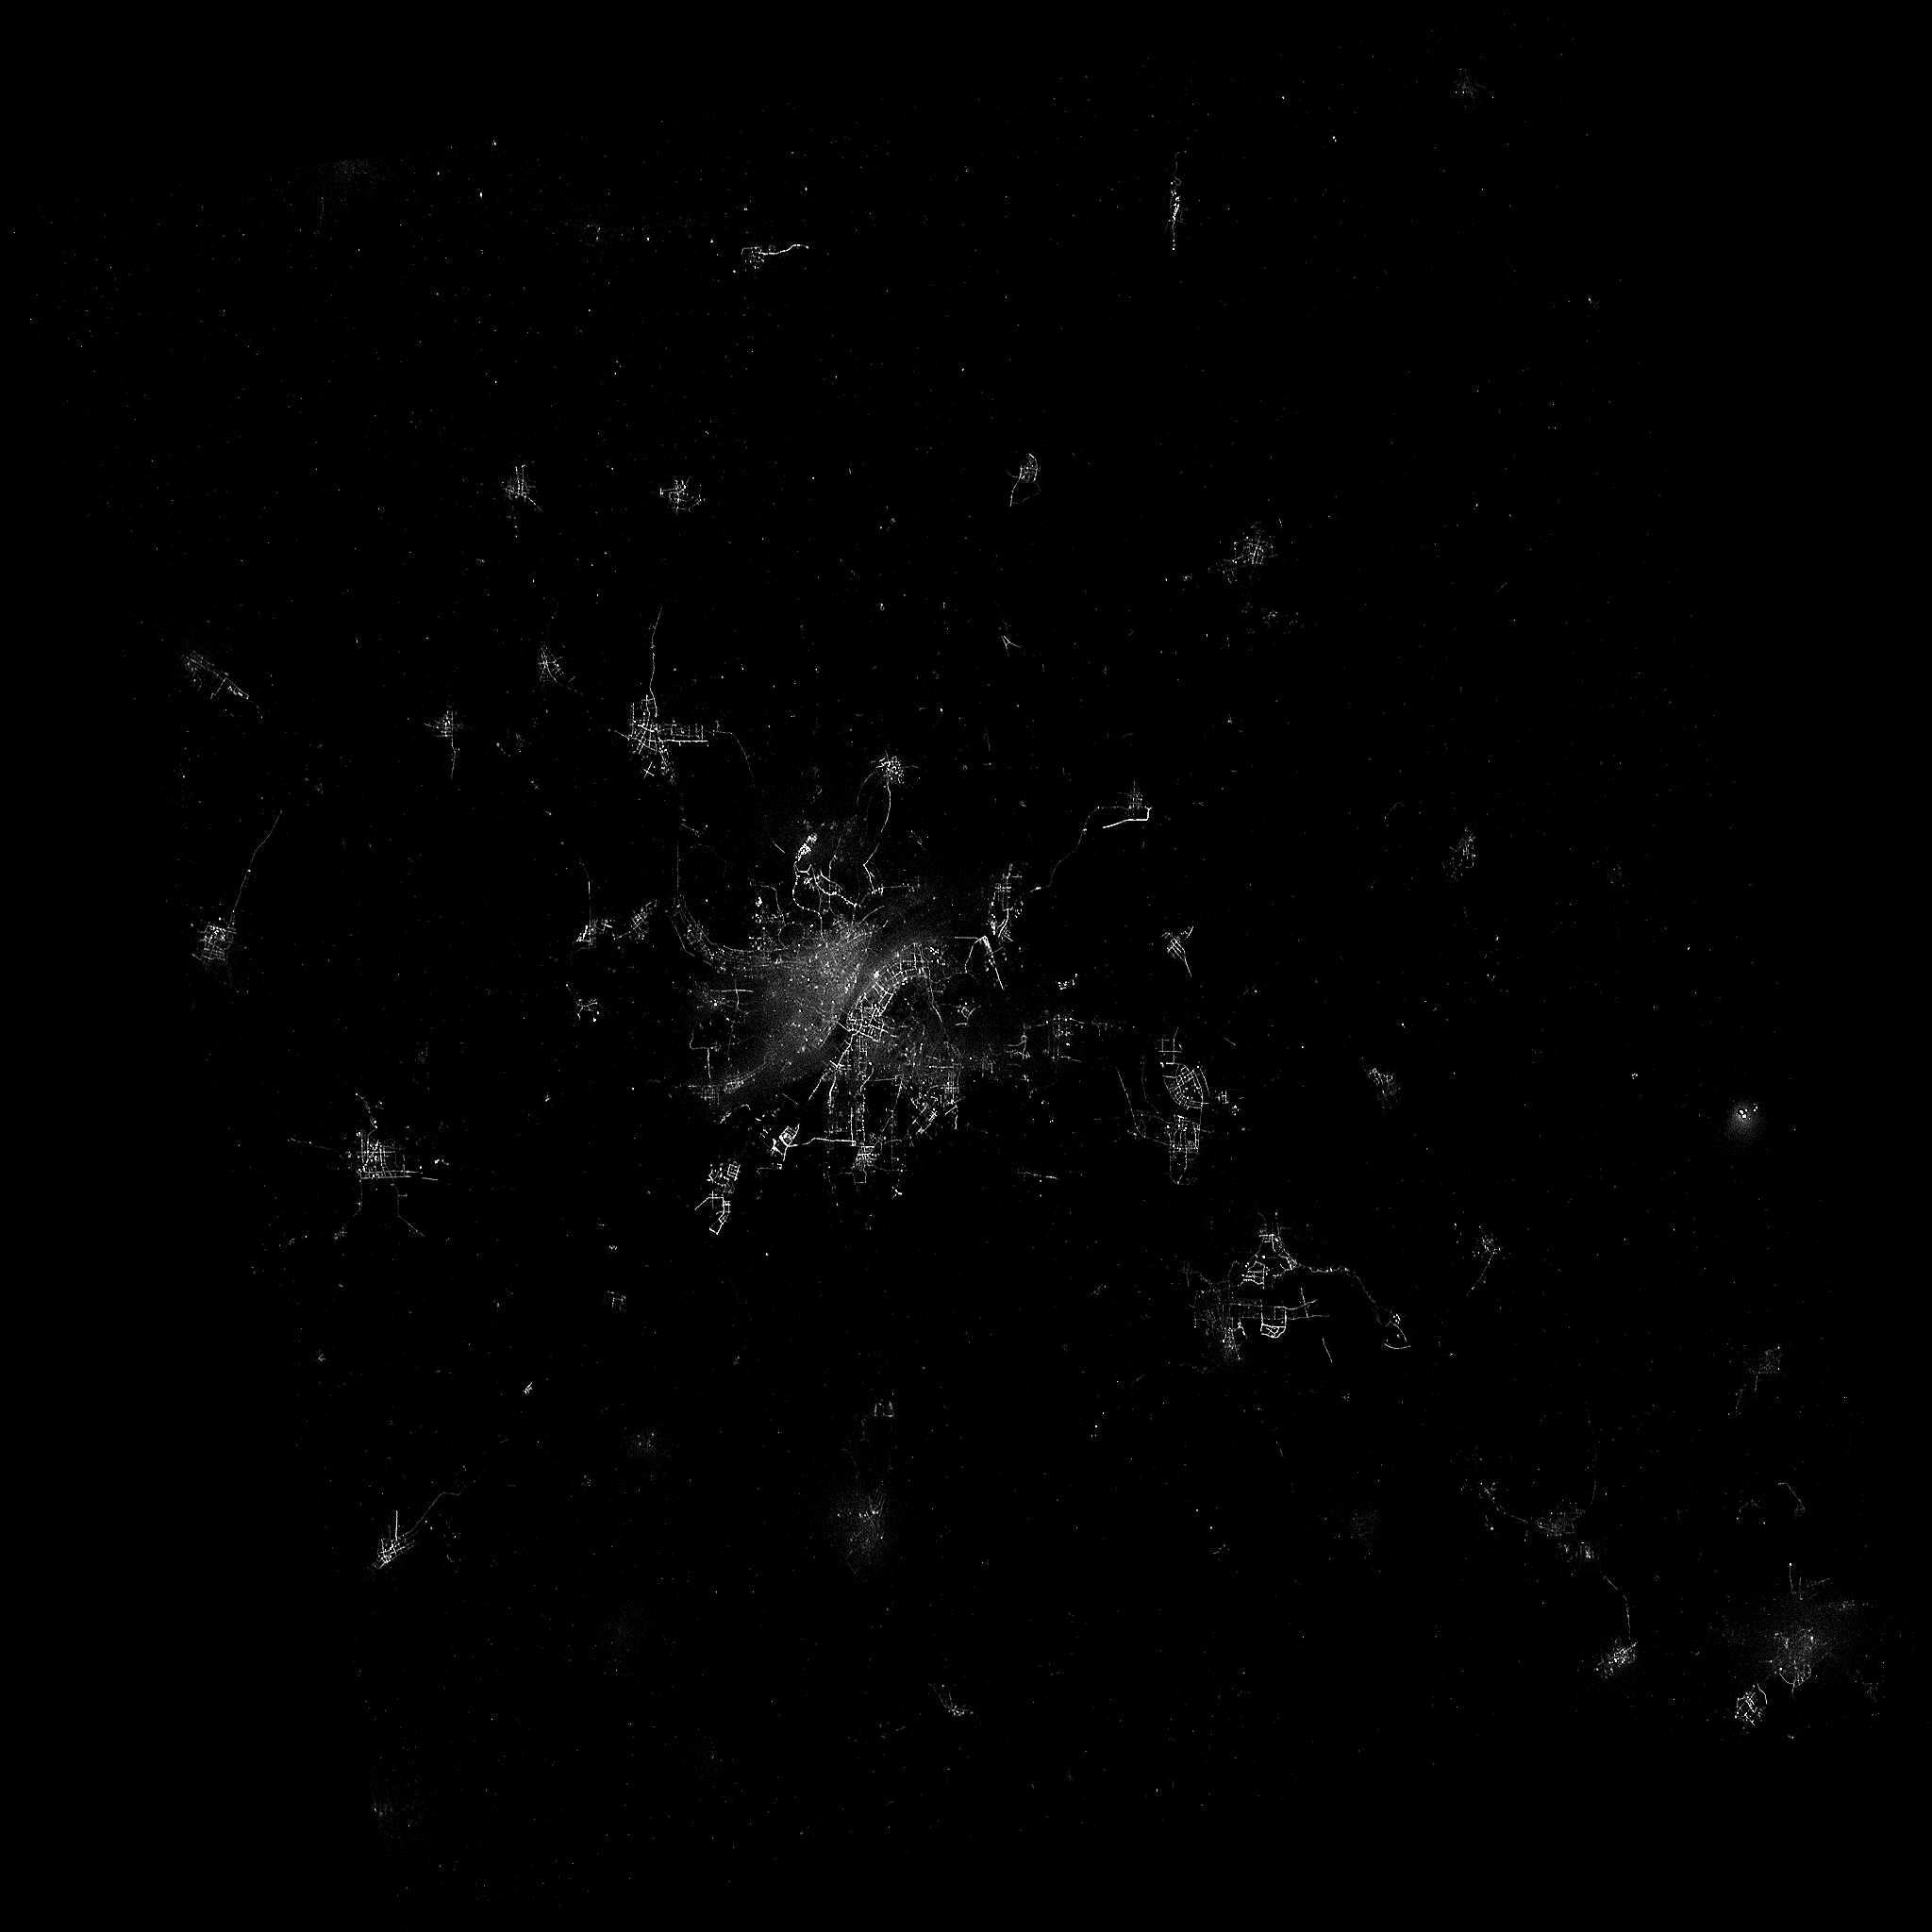

In [12]:
kernel = np.genfromtxt('filter.csv', delimiter=',')
out_img = cv2.filter2D(img, -1, kernel)
show_img(out_img)

Remove bright light, generate proto cloud mask

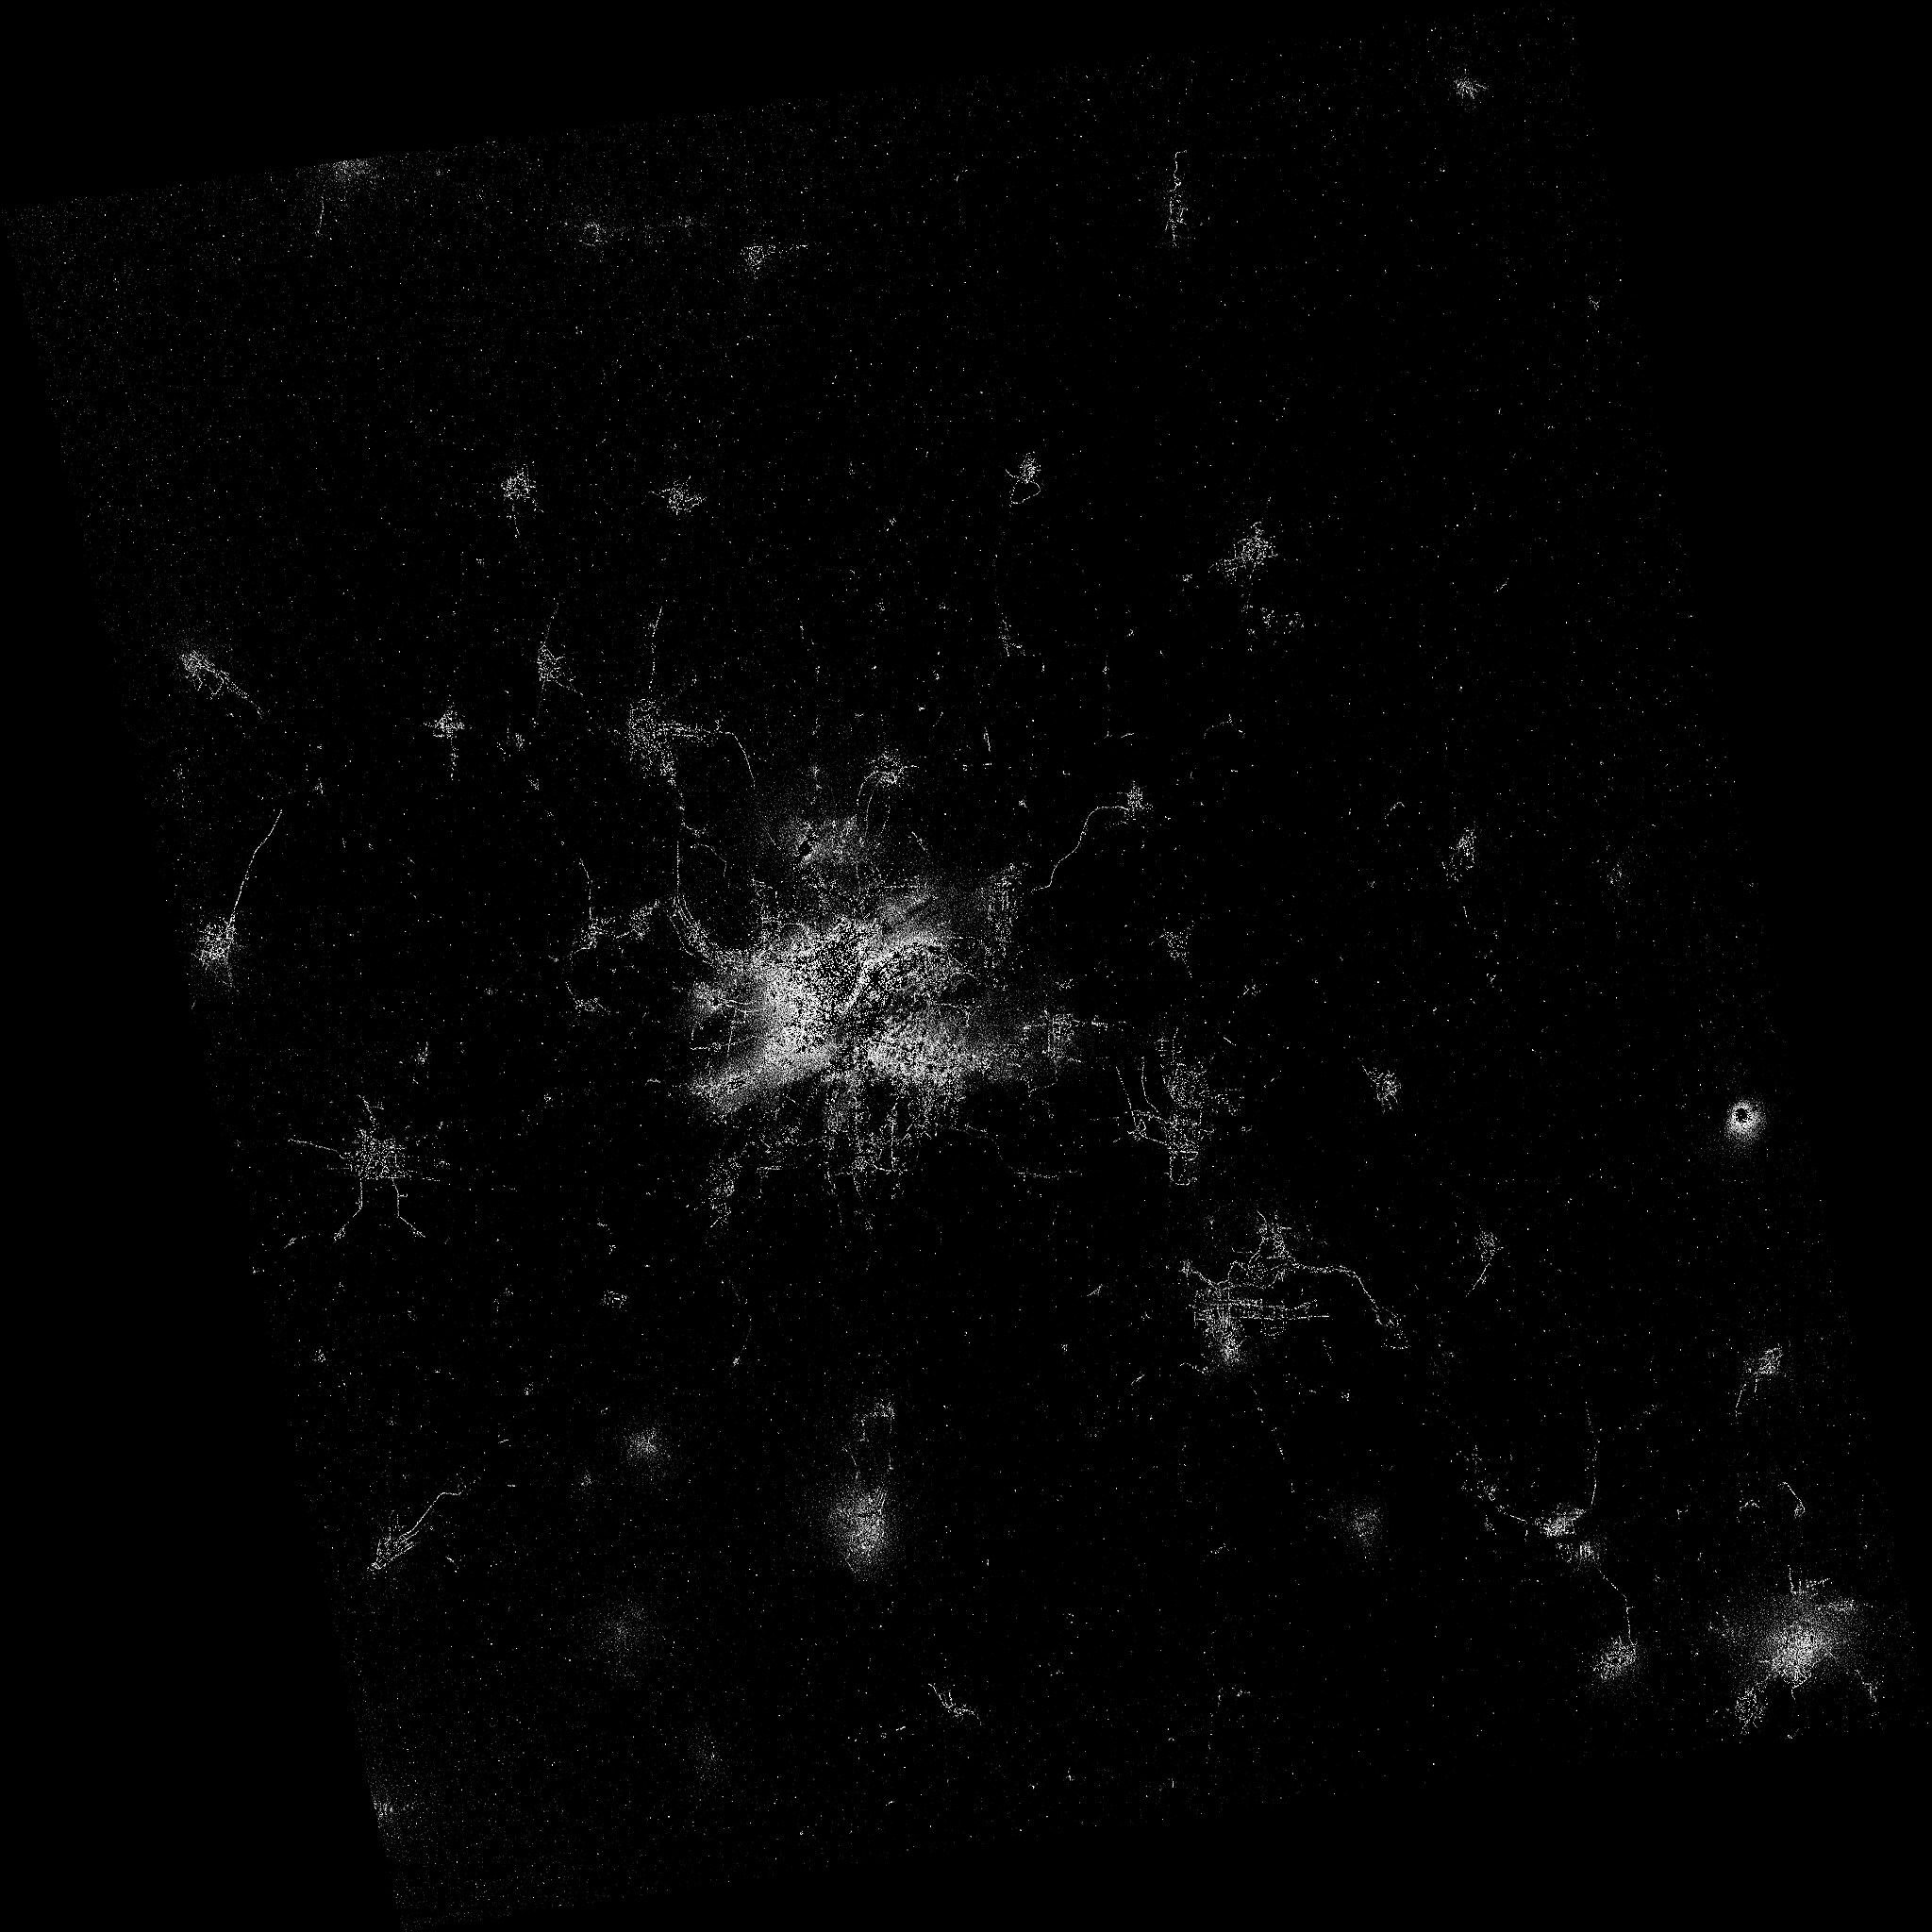

In [13]:
out_img = lowpass(out_img, 70)
show_img(out_img * 5)

Filter out streetlights

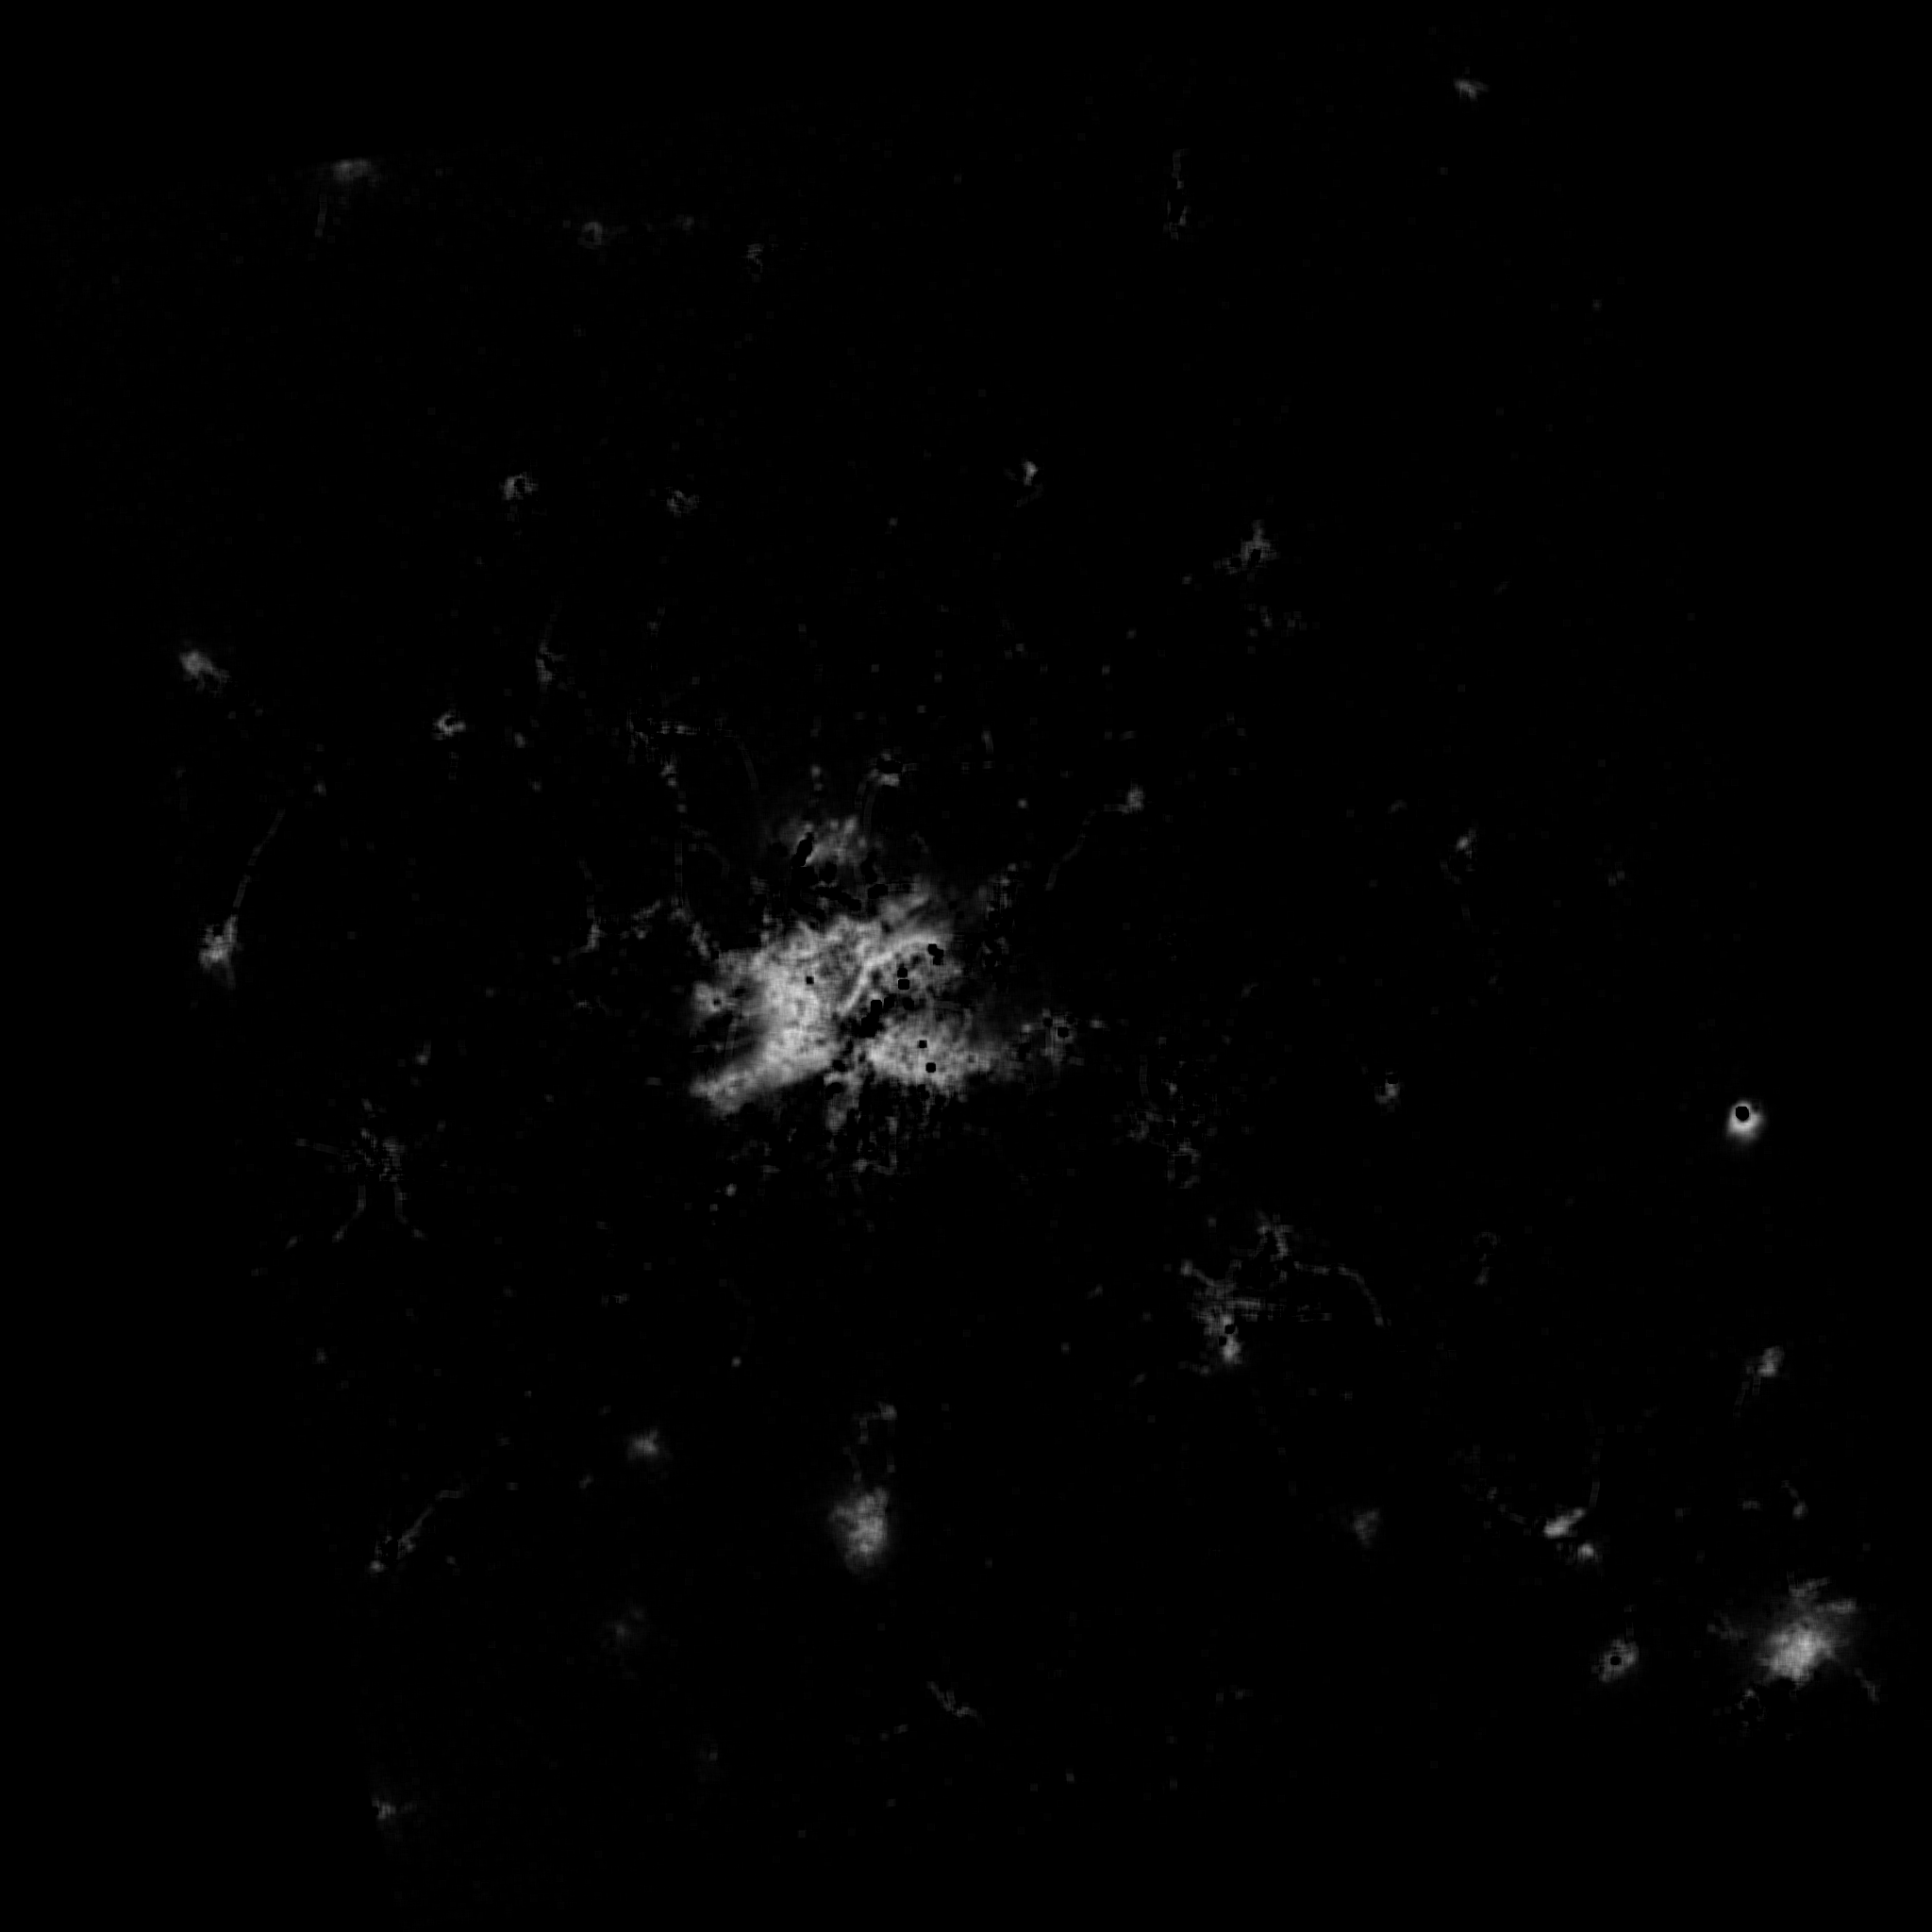

In [14]:
out_img = cv2.blur(out_img, (8, 8))
show_img(out_img * 5)

Remove noise

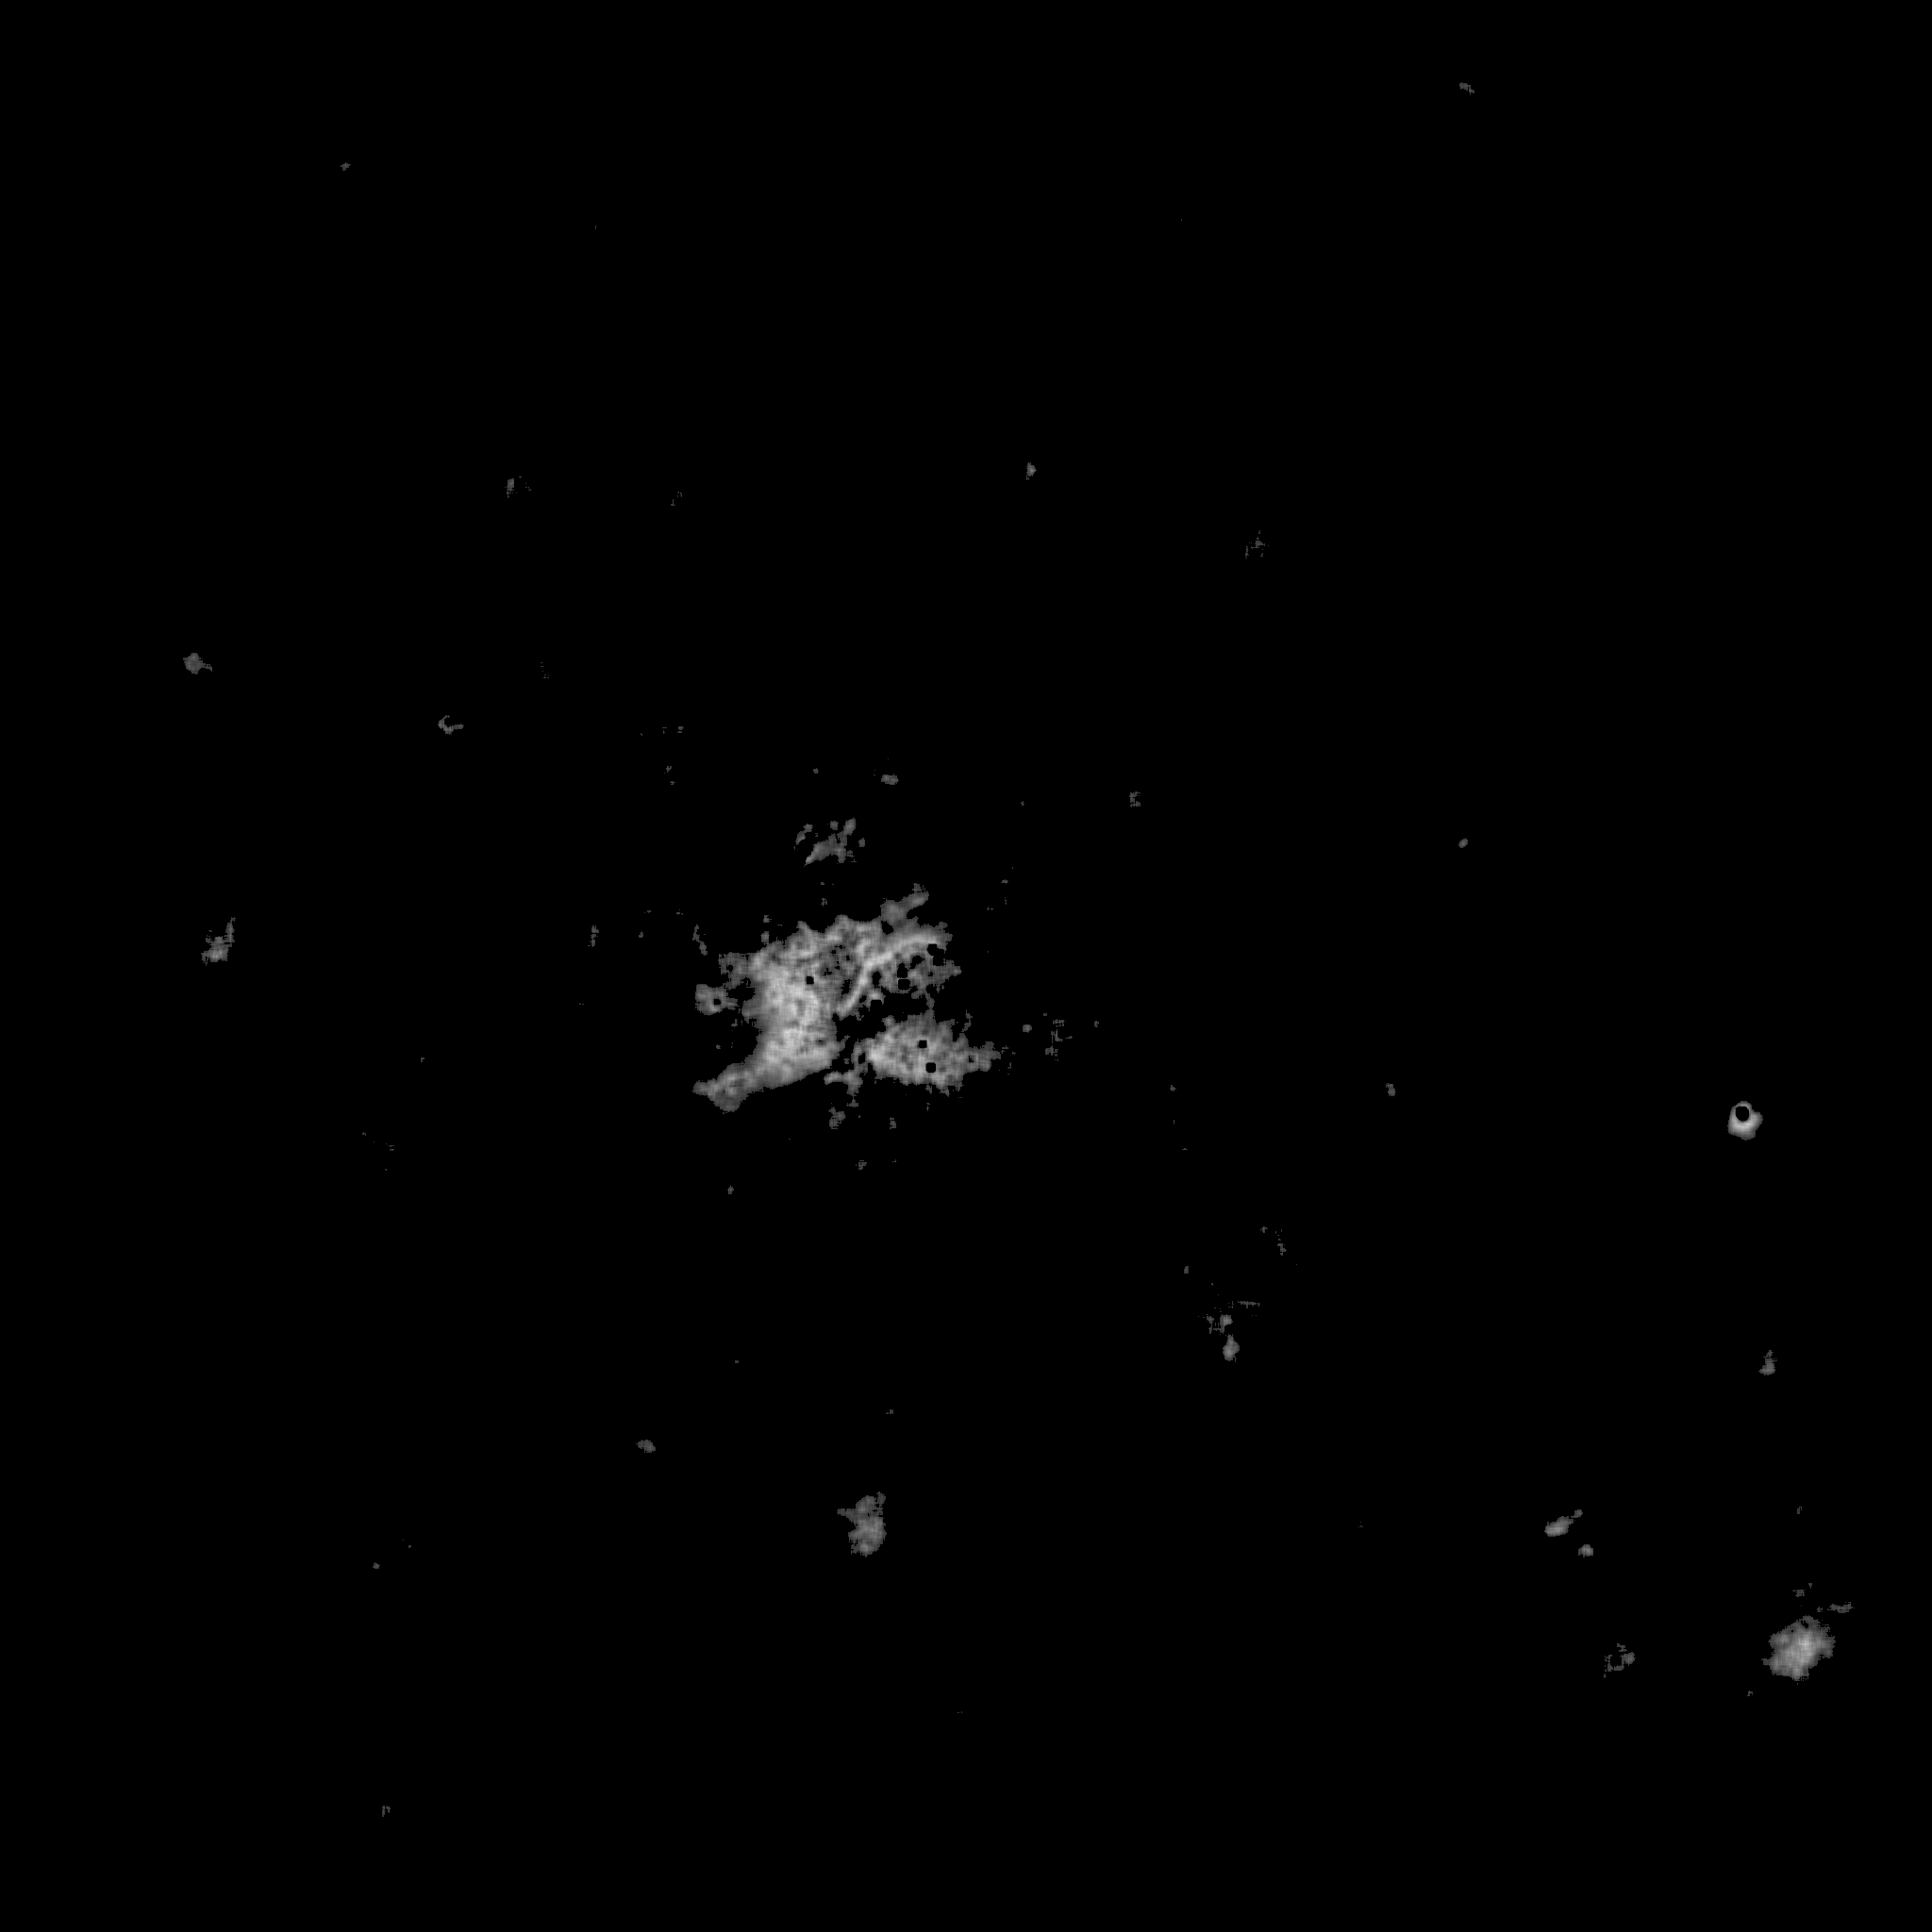

In [15]:
out_img = highpass(out_img, 10)
show_img(out_img * 5)

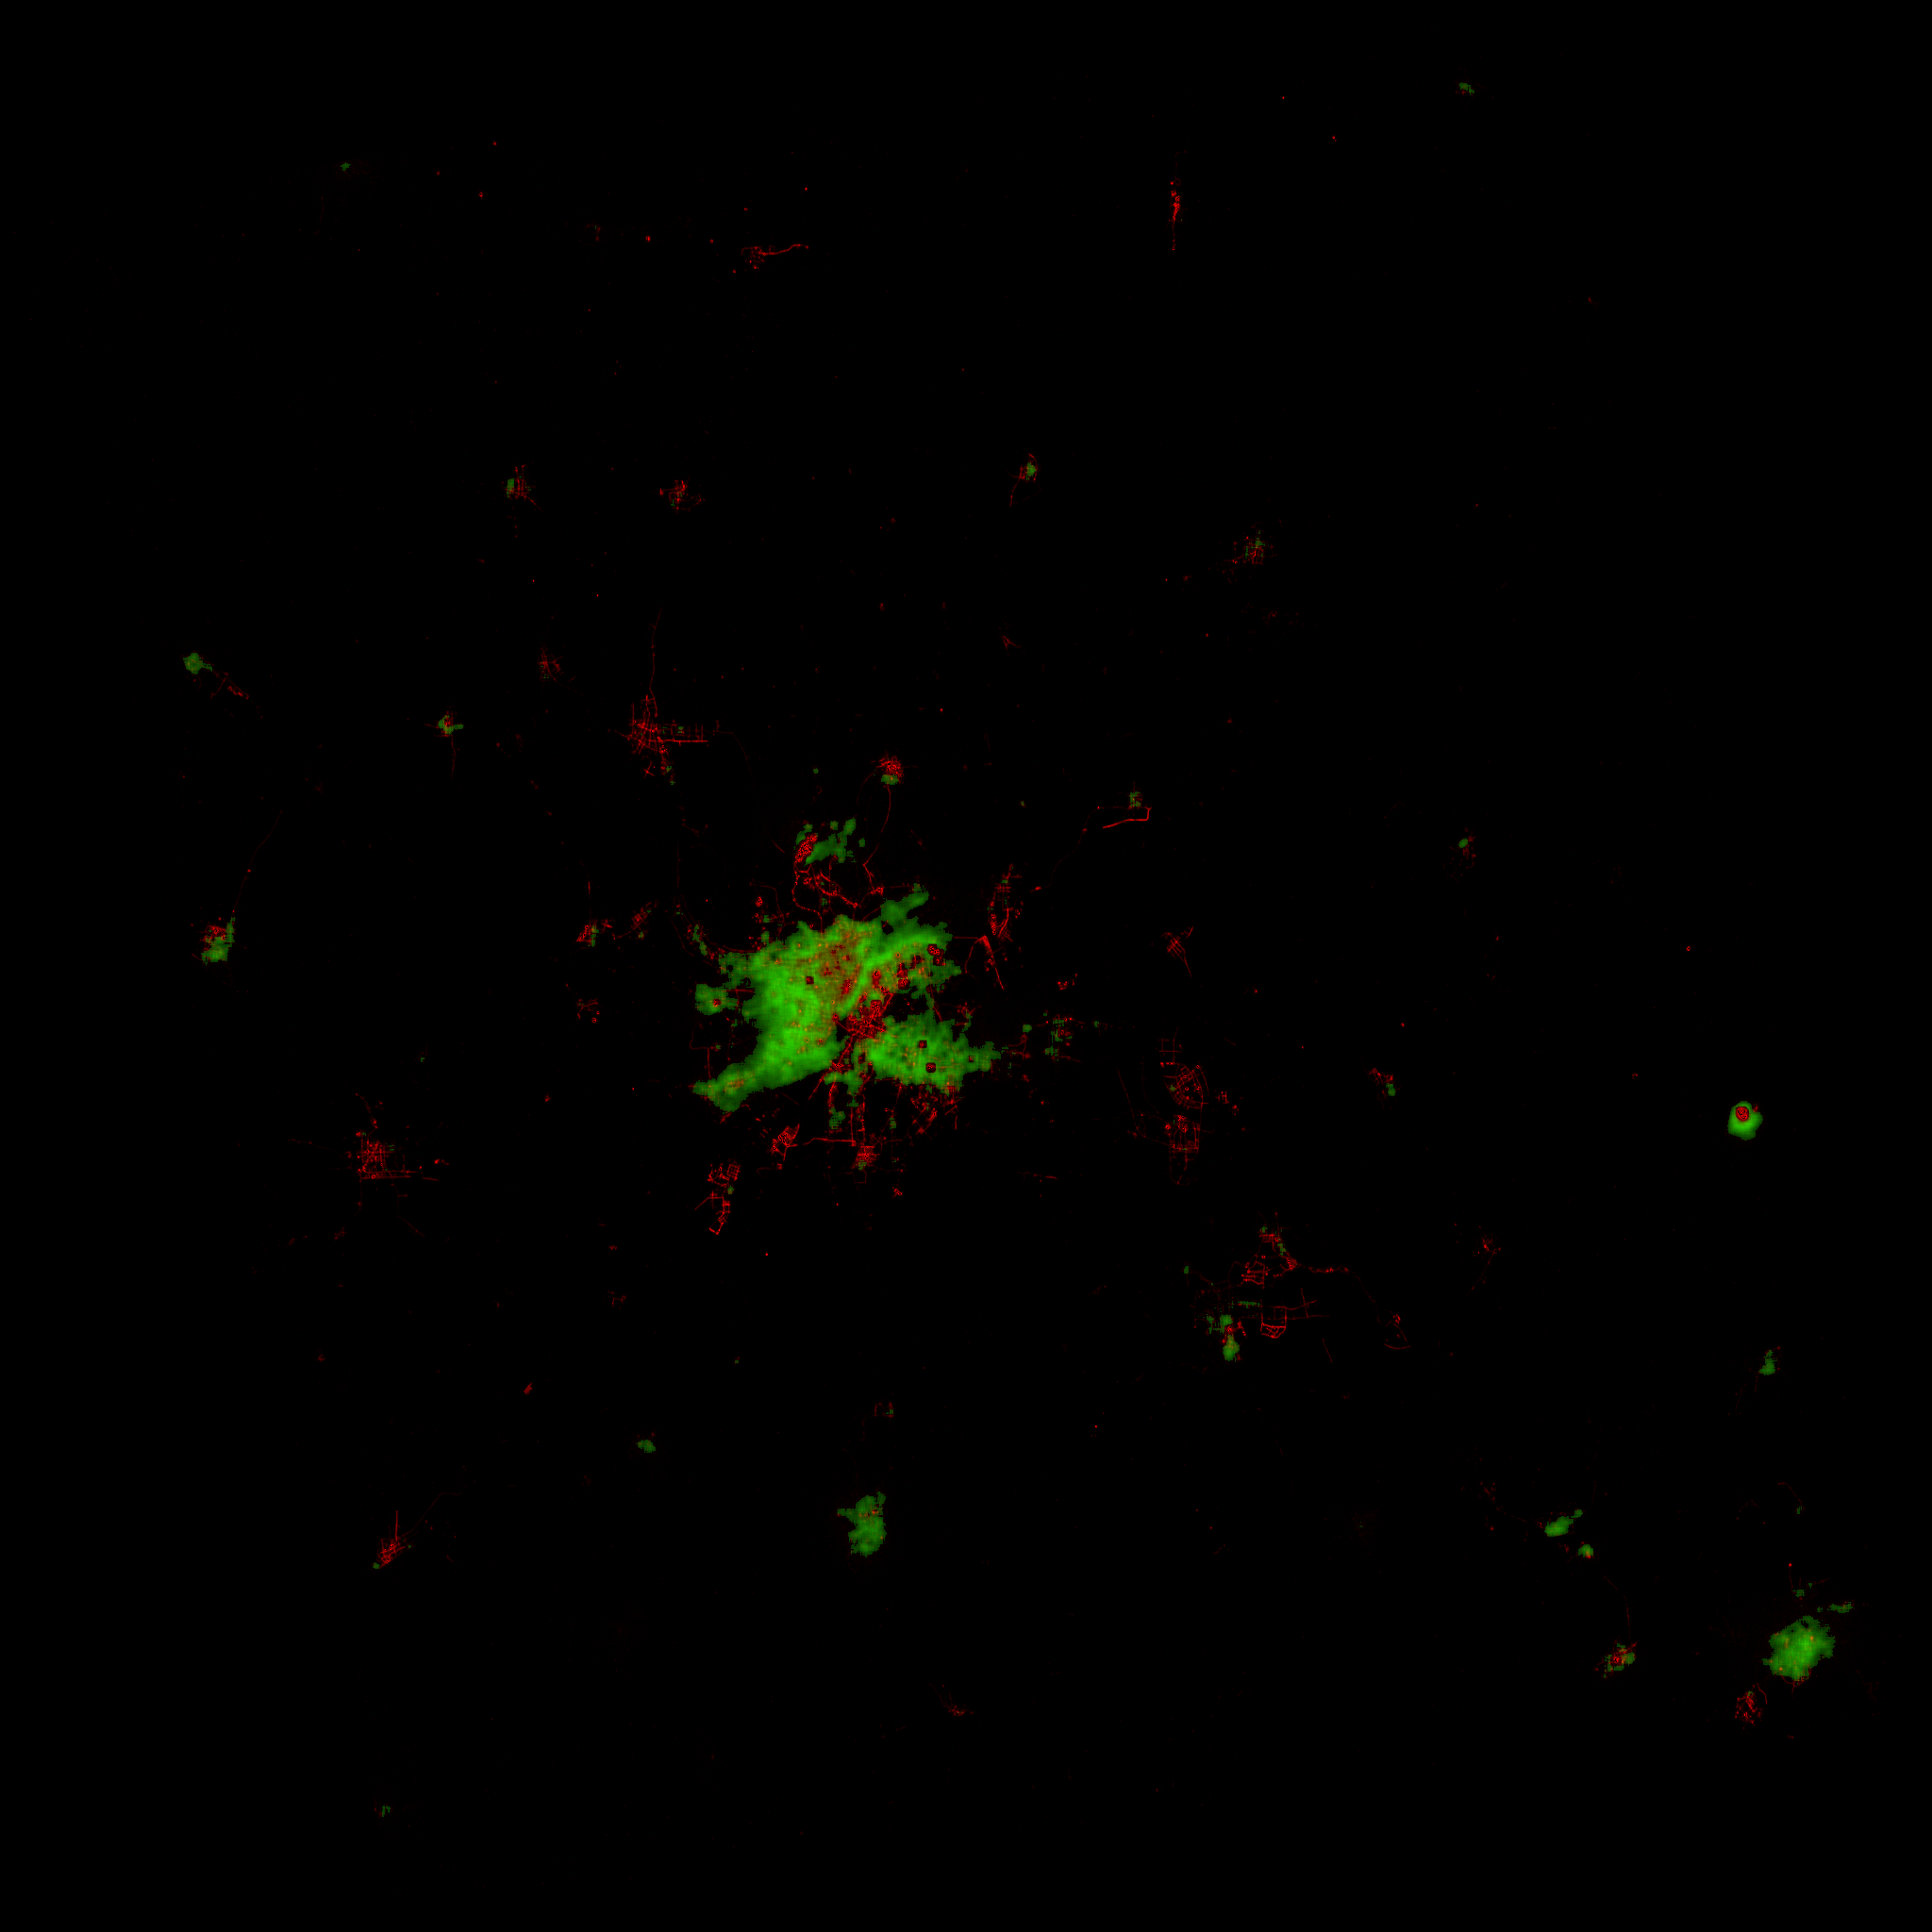

In [16]:
out_img_rgb = np.uint8(np.round(np.dstack((img, out_img * 5, np.zeros((R, C))))))
out_img_rgb = Image.fromarray(out_img_rgb)
display(out_img_rgb)